In [2]:
import sys
sys.path.append("..")

import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

In [13]:
columns_sars_cov2 = dt.get_columns('A549', 'sars-cov2')
columns_iav = dt.get_columns('A549', 'iav')
columns_rsv = dt.get_columns('A549', 'rsv')
columns_hpiv3 = dt.get_columns('A549', 'hpiv3')

data = dt.get_complete_data()[columns_sars_cov2 + columns_iav + columns_rsv + columns_hpiv3]
data = data.T.loc[:, data.T.apply(pd.Series.nunique) != 1].T # remove constant rows
data

,Series2_A549_SARS-CoV-2_1,Series2_A549_SARS-CoV-2_2,Series2_A549_SARS-CoV-2_3,Series5_A549_SARS-CoV-2_1,Series5_A549_SARS-CoV-2_2,Series5_A549_SARS-CoV-2_3,Series4_A549_IAV_1,Series4_A549_IAV_2,Series3_A549_RSV_1,Series3_A549_RSV_2,Series8_A549_HPIV3_3,Series8_A549_HPIV3_2,Series8_A549_HPIV3_1
DDX11L1,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WASH7P,4.189655,4.382027,3.891820,3.663562,3.871201,4.189655,1.386294,1.386294,3.951244,3.784190,2.564949,3.178054,2.708050
LOC729737,2.197225,2.397895,2.397895,0.693147,2.639057,1.609438,0.000000,1.098612,3.637586,2.484907,1.386294,1.791759,1.791759
LOC100133331,3.828641,3.761200,3.610918,3.465736,3.806662,4.605170,2.397895,1.386294,3.258097,2.833213,3.044522,2.944439,3.178054
LOC100288069,3.433987,2.890372,2.708050,2.833213,3.258097,3.806662,2.197225,1.386294,1.609438,1.386294,2.079442,2.890372,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD24,9.413363,8.951699,8.740977,7.949797,8.720950,8.928375,7.724888,6.429719,7.442493,6.828712,8.628198,8.387085,8.837391
BCORP1,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KDM5D,5.517453,5.472271,4.955827,4.663439,4.828314,5.568345,4.682131,2.995732,5.780744,5.298317,4.356709,4.158883,4.477337
EIF1AY,5.283204,4.983607,4.736198,4.356709,4.317488,5.017280,4.488636,2.708050,4.770685,4.304065,4.343805,4.204693,4.330733


In [14]:
filtered_data = dt.get_p_values('mannwhitneyu', data, columns_sars_cov2, columns_iav + columns_rsv + columns_hpiv3, limit = 0.01)
filtered_data

,Series2_A549_SARS-CoV-2_1,Series2_A549_SARS-CoV-2_2,Series2_A549_SARS-CoV-2_3,Series5_A549_SARS-CoV-2_1,Series5_A549_SARS-CoV-2_2,Series5_A549_SARS-CoV-2_3,Series4_A549_IAV_1,Series4_A549_IAV_2,Series3_A549_RSV_1,Series3_A549_RSV_2,Series8_A549_HPIV3_3,Series8_A549_HPIV3_2,Series8_A549_HPIV3_1,p-value
WASH7P,4.189655,4.382027,3.891820,3.663562,3.871201,4.189655,1.386294,1.386294,3.951244,3.784190,2.564949,3.178054,2.708050,0.009048
LOC100133331,3.828641,3.761200,3.610918,3.465736,3.806662,4.605170,2.397895,1.386294,3.258097,2.833213,3.044522,2.944439,3.178054,0.001703
LOC100288069,3.433987,2.890372,2.708050,2.833213,3.258097,3.806662,2.197225,1.386294,1.609438,1.386294,2.079442,2.890372,2.564949,0.004961
SAMD11,6.959399,6.869014,6.580639,6.569481,6.543912,7.180070,3.135494,3.433987,6.146329,5.579730,5.786897,5.564520,5.361292,0.001703
KLHL17,5.996452,5.966147,5.799093,4.919981,5.204007,5.940171,3.555348,2.995732,5.583496,4.990433,4.174387,4.543295,4.043051,0.006210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAB39B,3.178054,3.401197,3.091042,5.308268,5.147494,5.902633,3.784190,1.609438,2.484907,1.791759,3.091042,3.091042,2.772589,0.008889
TMLHE,5.852202,5.717028,5.278115,5.634790,5.765191,6.159095,4.795791,3.258097,4.219508,3.526361,5.231109,4.787492,5.337538,0.002670
UTY,4.564348,4.007333,3.496508,3.806662,4.304065,4.653960,3.496508,1.609438,3.663562,2.772589,3.295837,3.258097,3.871201,0.007510
TMSB4Y,2.708050,1.791759,2.079442,1.386294,1.609438,2.302585,0.000000,0.000000,1.098612,1.386294,0.693147,0.693147,1.386294,0.002485


In [5]:
filtered_data.drop(['p-value'], axis = 1, inplace = True)

C:\Users\Pedro\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
labels = []

for col in filtered_data.columns:
    info = dt.get_info_from_name(col)
    labels += ['%s %s (S%s)' % (info['Condition'], info['Cell Type'], info['Series'].split('Series')[1])]

labels

['SARS-CoV-2 A549 (S2)',
 'SARS-CoV-2 A549 (S2)',
 'SARS-CoV-2 A549 (S2)',
 'SARS-CoV-2 A549 (S5)',
 'SARS-CoV-2 A549 (S5)',
 'SARS-CoV-2 A549 (S5)',
 'IAV A549 (S4)',
 'IAV A549 (S4)',
 'RSV A549 (S3)',
 'RSV A549 (S3)',
 'HPIV3 A549 (S8)',
 'HPIV3 A549 (S8)',
 'HPIV3 A549 (S8)']

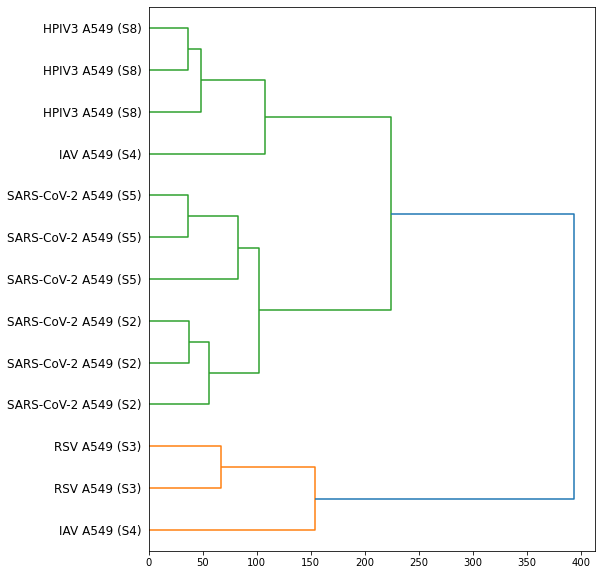

In [7]:
fig = plt.figure(figsize=(8, 10))

dendrogram = sch.dendrogram(sch.linkage(filtered_data.T, method="ward") , labels = labels, orientation='right')
plt.show()

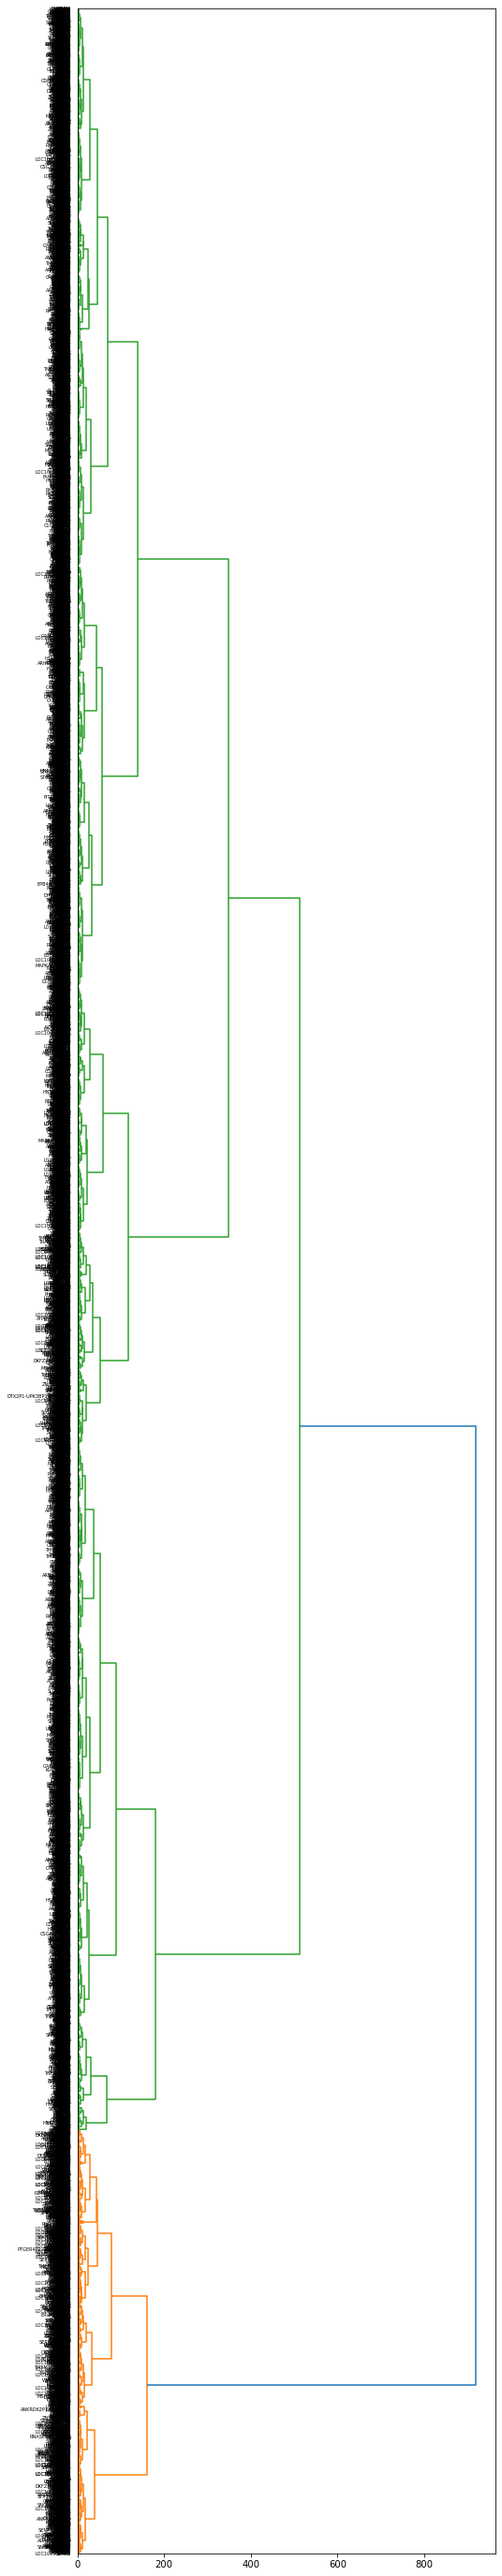

In [10]:
fig = plt.figure(figsize=(8, 50))

dendrogram = sch.dendrogram(sch.linkage(filtered_data, method="ward") , labels = list(filtered_data.index), orientation='right')
plt.show()

In [7]:
labels = {}

models = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
labels['distance'] = models.fit_predict(filtered_data)

In [8]:
labels['distance']

array([2, 2, 1, ..., 0, 0, 2], dtype=int64)

In [15]:
dissimilarity = 1 - np.abs(filtered_data.T.corr())
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['pearson'] = fcluster(np.clip(hierarchy, 0, None), 3, criterion='maxclust') - 1

C:\Users\Pedro\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2267: RuntimeWarning: invalid value encountered in less
  if (Z[:, 2] < 0).any():


In [16]:
labels['pearson']

array([0, 1, 2, ..., 2, 2, 1], dtype=int32)

In [12]:
dissimilarity = 1 - np.abs(filtered_data.T.corr(method='spearman'))
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['spearman'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [13]:
labels['spearman']

array([0, 0, 1, ..., 1, 1, 0], dtype=int32)

In [17]:
from itertools import groupby

clusters = {}

for key1, label1 in labels.items():
    clusters[key1] = [list(map(lambda x: x[0], v)) for k,v in groupby(sorted(zip(filtered_data.index, labels['spearman']), key = lambda x: x[1]), lambda s: s[1])]
    
    for key2, label2 in labels.items():
        if key1 != key2:
            print(key1, ' vs ', key2, ': ', adjusted_rand_score(label1, label2))

distance  vs  spearman :  0.09483265603645298
distance  vs  pearson :  0.21085549438681658
spearman  vs  distance :  0.09483265603645298
spearman  vs  pearson :  0.3625422777127171
pearson  vs  distance :  0.21085549438681658
pearson  vs  spearman :  0.3625422777127171


In [ ]:
i = 0
for c in clusters['distance']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['pearson']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['spearman']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [18]:
import enrichmentAnalysis as ea

results_enrichment = {'distance': [], 'pearson': [], 'spearman': []}

for cluster_type in clusters:
    for cluster in clusters[cluster_type]:
        results_enrichment[cluster_type] += [ea.getEnrichment(list(cluster), 'GO_Biological_Process_2021')['GO_Biological_Process_2021']]

results_enrichment

Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlap

{'distance': [[[1,
    'positive regulation of vascular permeability (GO:0043117)',
    0.0002664409154792487,
    12.51754269826559,
    103.02385824350972,
    ['OCLN', 'ANGPT1', 'TRPV4', 'FGFBP3', 'TJP3'],
    0.39883989993997937,
    0,
    0],
   [2,
    'regulation of cytokine production (GO:0001817)',
    0.0004922076698623958,
    2.5582553847256566,
    19.485233129657825,
    ['BTN2A2',
     'BTN3A1',
     'TREX1',
     'HILPDA',
     'BTN3A3',
     'MIF',
     'GATA3',
     'VTCN1',
     'BTN3A2',
     'CLEC4A',
     'FGR',
     'IL6',
     'GPNMB',
     'SYT11',
     'ALOX5',
     'LEP',
     'SAA1',
     'LGALS9',
     'ICOSLG'],
    0.39883989993997937,
    0,
    0],
   [3,
    'unsaturated fatty acid metabolic process (GO:0033559)',
    0.000567557385852257,
    3.993566954460809,
    29.848593105534707,
    ['CYP2J2',
     'CYP2D6',
     'ALOX5',
     'CYP4F2',
     'PLA2G4C',
     'CYP4F3',
     'EPHX1',
     'SCD5',
     'ALOX15B',
     'FADS1'],
    0.39883989993997

In [19]:
import json

with open('results_NHBE_virus.json', 'w') as file:
     file.write(json.dumps(results_enrichment)) # use `json.loads` to do the reverse

In [14]:
import json

with open('results_NHBE_virus.json') as file:
    results_enrichment = json.load(file)

In [20]:
dataset = {'p-value': [], 'Score': [], 'Cluster': []}
index = []

for cluster_num in range(len(results_enrichment['distance'])):
    for term in results_enrichment['distance'][cluster_num]:
        index += [term[1]]
        dataset['p-value'] += [term[6]]
        dataset['Score'] += [term[4]]
        dataset['Cluster'] += [cluster_num]
enrichment_dataset = pd.DataFrame(dataset, index = index)

In [21]:
pd.set_option("display.max_rows", None)
selection = enrichment_dataset[enrichment_dataset['p-value'] < 0.01].sort_values('Score', ascending = False).head(25)

selection['p-value'] = selection['p-value'].map(lambda x: '%.2E' % x)
selection['Score'] = selection['Score'].map(lambda x: '%.2f' % x)

#selection.to_csv('NHBE_table.csv')
selection

,p-value,Score,Cluster


## Clustering on columns

NameError: name 'title' is not defined

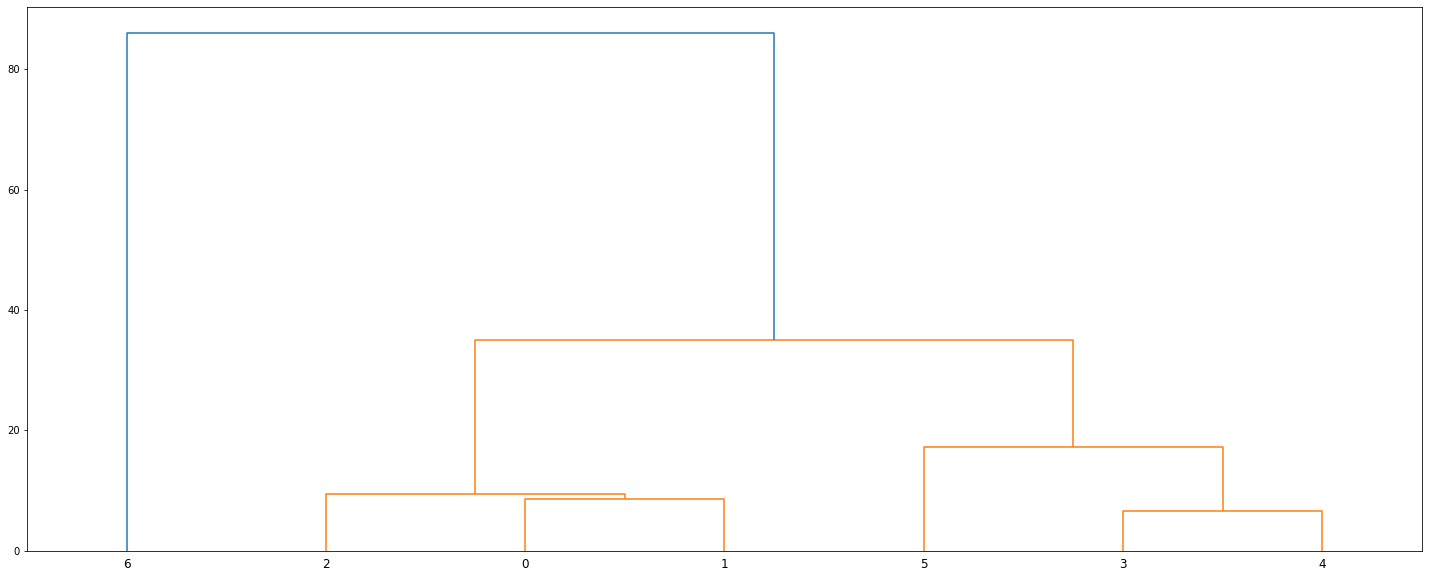

In [13]:
fig = plt.figure(figsize=(25, 10))
dendrogram = sch.dendrogram(sch.linkage(filtered_data.T, method="ward"))
plt.title(title)
plt.xlabel()
plt.ylabel('Distances')
plt.show()

In [108]:
labels_columns = {}

models = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
labels_columns['distance'] = models.fit_predict(filtered_data.T)

labels_columns['distance']

array([1, 1, 1, 0, 0, 0], dtype=int64)